In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [5]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Central Limits Theorem (CLT)

Assume we have a data-set with **not-normal** destribution. For instance *exponential* destribution.

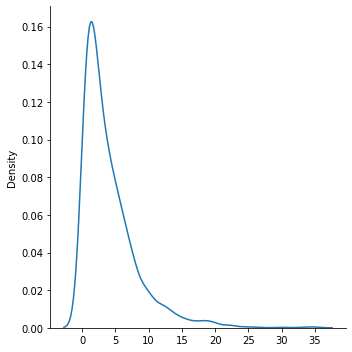

In [6]:
sns.displot(np.random.exponential(scale=4.0, size=2000), kind='kde')

In [7]:
sample_size = 2

df_2 = pd.DataFrame(index = ['x1', 'x2'])

for i in range(1, 51):
  exponential_sample = np.random.exponential(4.0, sample_size)
  col = f"sample {i}"
  df_2[col] = exponential_sample

df_2

,sample 1,sample 2,sample 3,sample 4,sample 5,sample 6,sample 7,sample 8,sample 9,sample 10,sample 11,sample 12,sample 13,sample 14,sample 15,sample 16,sample 17,sample 18,sample 19,sample 20,sample 21,sample 22,sample 23,sample 24,sample 25,sample 26,sample 27,sample 28,sample 29,sample 30,sample 31,sample 32,sample 33,sample 34,sample 35,sample 36,sample 37,sample 38,sample 39,sample 40,sample 41,sample 42,sample 43,sample 44,sample 45,sample 46,sample 47,sample 48,sample 49,sample 50
x1,3.499698,0.364483,6.699853,2.389494,2.842908,0.601830,5.529524,9.852805,8.918788,0.320136,4.209409,6.291785,3.134126,2.120783,3.133032,1.300754,10.327653,1.928334,0.356165,5.968889,18.929733,7.650644,0.386805,1.484062,0.087920,14.585522,1.509177,8.560740,1.15170,4.846573,4.849412,3.961269,14.829415,2.390342,7.304069,4.343378,15.047475,1.370141,8.336130,5.352354,4.456749,1.44008,6.227306,9.287162,3.196326,14.605344,5.783428,2.641691,5.645686,4.185675
x2,1.120044,8.431988,2.103572,9.632606,0.690847,2.608782,4.317773,2.893429,3.699253,2.155452,9.221497,1.419944,4.422238,4.519390,2.272883,0.399299,3.108303,2.596672,7.492756,0.937636,6.760859,5.261784,0.182027,1.451945,11.412526,9.735861,2.385067,3.028555,1.54589,1.838032,4.428281,1.414143,0.688165,12.611907,3.306153,8.650040,3.505524,8.431120,3.372429,2.543594,3.245271,5.69261,0.963697,1.097810,3.368334,4.455397,0.948393,0.653190,2.879446,2.851661


For visualization we will use *jointplot()*, since we want to depict full two figures.

In [8]:
df_2_sample_means = df_2.mean()
df_2_sample_means

sample 1      2.309871
sample 2      4.398236
sample 3      4.401713
sample 4      6.011050
sample 5      1.766877
sample 6      1.605306
sample 7      4.923648
sample 8      6.373117
sample 9      6.309020
sample 10     1.237794
sample 11     6.715453
sample 12     3.855865
sample 13     3.778182
sample 14     3.320086
sample 15     2.702957
sample 16     0.850027
sample 17     6.717978
sample 18     2.262503
sample 19     3.924460
sample 20     3.453262
sample 21    12.845296
sample 22     6.456214
sample 23     0.284416
sample 24     1.468003
sample 25     5.750223
sample 26    12.160691
sample 27     1.947122
sample 28     5.794648
sample 29     1.348795
sample 30     3.342302
sample 31     4.638847
sample 32     2.687706
sample 33     7.758790
sample 34     7.501125
sample 35     5.305111
sample 36     6.496709
sample 37     9.276500
sample 38     4.900631
sample 39     5.854280
sample 40     3.947974
sample 41     3.851010
sample 42     3.566345
sample 43     3.595502
sample 44  

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


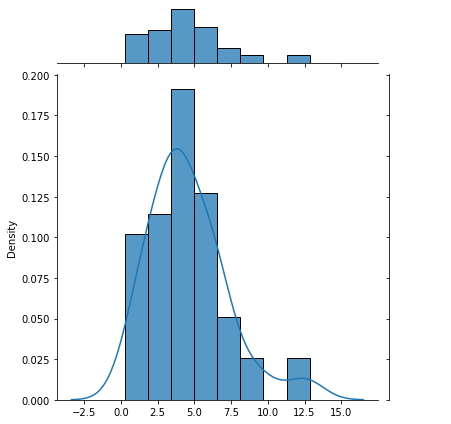

In [9]:
kde = sns.jointplot(df_2_sample_means, kind="hist", stat="density")
kde.plot_joint(sns.kdeplot)

Now we will repeat it, but with 30 samples. As it is said by theory.

In [10]:
sample_size = 30

df_30 = pd.DataFrame()

for i in range(1, 51):
  exponential_sample = np.random.exponential(4.0, sample_size)
  col = f"sample {i}"
  df_30[col] = exponential_sample

df_30_sample_means = df_30.mean()

And...visualize.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


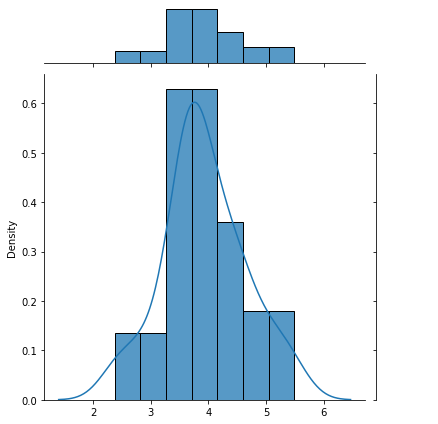

In [11]:
kde = sns.jointplot(df_30_sample_means, kind="hist", stat="density")
kde.plot_joint(sns.kdeplot)

# Z-Scores

In [12]:
data = pd.DataFrame(np.random.randint(0, 10, size=(5, 3)), columns=["A", "B", "C"])
data

,A,B,C
0,4,2,5
1,5,1,5
2,4,4,3
3,6,9,5
4,8,8,3


*Scipy* is very powerfull library of several mathematical tools inside. See below how can we compute *Z-scores* for whole Dataframe. 

In [13]:
import scipy.stats as stats

data.apply(stats.zscore)

,A,B,C
0,-0.935414,-0.878438,0.816497
1,-0.267261,-1.192166,0.816497
2,-0.935414,-0.250982,-1.224745
3,0.400892,1.317657,0.816497
4,1.737198,1.003929,-1.224745


In addition, here you can see how to compute *Z-scores* for specific column with help of *pandas*.

In [14]:
mean_A = data["A"].mean()
std_A = data["A"].std(ddof=0)

data["A"].apply(lambda x: ( (x-mean_A) / std_A))

0   -0.935414
1   -0.267261
2   -0.935414
3    0.400892
4    1.737198
Name: A, dtype: float64



---

**Q 11.01** - Computation of Z-Score

*Task 1.*

Nutritionists measured the sugar content (in grams) for 32 drinks at Jake's Java coffee shop. The drinks had a mean of 18g and a standard deviation of 5g and the distribution was roughly symmetric.

A Grande Mocha Cappuccino at Jake's Java contains 14g of sugar.

In [2]:
Q1_mean = 18
Q1_std = 5
Q1_X = 14

Q1_Z = (Q1_X -Q1_mean)/Q1_std
print(Z)


-0.8


*Task 2.*

Drinks at Ben's Beans have a mean sugar content of 20g with a standard deviation of 6g. The sugar content in a Grande Cappuccino at Ben's Beans has a z-score of -0.75 compared to the rest of the drinks at that shop.

How much sugar is in a Grande Cappuccino at Ben's Beans?

In [3]:
Q2_mean = 20
Q2_std = 6
Q2_Z = -0.75

q2_X = (Q2_Z*Q2_std)+Q2_mean
print(q2_X)

15.5




---



Let's check Z-scores for prices for BTC currency.

In [15]:
import glob, os

path_name = "/content/drive/MyDrive/Data analytics course/Crypto Hist Prices/*.csv"

all_files = glob.glob(path_name)
print(all_files)

df_list = []

for filename in all_files:
    df = pd.read_csv(filename)
    df_list.append(df)

df_concat = pd.concat(df_list, axis=0, ignore_index=True)

['/content/drive/MyDrive/Data analytics course/Crypto Hist Prices/coin_Iota.csv', '/content/drive/MyDrive/Data analytics course/Crypto Hist Prices/coin_Cardano.csv', '/content/drive/MyDrive/Data analytics course/Crypto Hist Prices/coin_ChainLink.csv', '/content/drive/MyDrive/Data analytics course/Crypto Hist Prices/coin_EOS.csv', '/content/drive/MyDrive/Data analytics course/Crypto Hist Prices/coin_CryptocomCoin.csv', '/content/drive/MyDrive/Data analytics course/Crypto Hist Prices/coin_BinanceCoin.csv', '/content/drive/MyDrive/Data analytics course/Crypto Hist Prices/coin_Bitcoin.csv', '/content/drive/MyDrive/Data analytics course/Crypto Hist Prices/coin_Aave.csv', '/content/drive/MyDrive/Data analytics course/Crypto Hist Prices/coin_Dogecoin.csv', '/content/drive/MyDrive/Data analytics course/Crypto Hist Prices/coin_Litecoin.csv', '/content/drive/MyDrive/Data analytics course/Crypto Hist Prices/coin_Ethereum.csv', '/content/drive/MyDrive/Data analytics course/Crypto Hist Prices/coin_

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


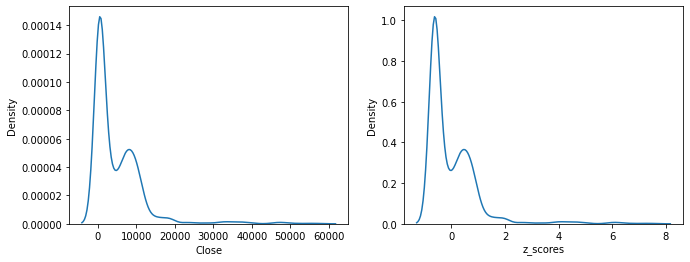

In [16]:
df_concat_btc = df_concat[df_concat.Symbol == "BTC"]

mean = df_concat_btc["Close"].mean()
stdev = df_concat_btc["Close"].std(ddof=0)

df_concat_btc['z_scores'] = df_concat_btc["Close"].apply(lambda x: ( (x-mean) / stdev))

plt.figure(figsize=(11 ,4))

plt.subplot(1, 2, 1)
sns.kdeplot(data=df_concat_btc, x="Close") #noskaidrot, kas ir density

plt.subplot(1, 2, 2)
sns.kdeplot(data=df_concat_btc, x="z_scores")